In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


In [4]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("../data/selected_features.csv")

# Train-Test Split
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Ensure the folder 'data/' exists
os.makedirs('data', exist_ok=True)

# Save test data to CSV
test_data = X_test.copy()
test_data['target'] = y_test
test_data.to_csv('../data/test_data.csv', index=False)


In [6]:
import joblib
joblib.dump(df, "../data/df.pkl")  # Save the dataset


['../data/df.pkl']

In [7]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

def plot_roc_curve(y_true, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
    plt.plot([0,1],[0,1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.title(f"{model_name} - ROC Curve")
    plt.show()


C:\Users\dedee\Downloads\Epitope_Prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:26:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      2177
           1       0.90      0.88      0.89      2169

    accuracy                           0.89      4346
   macro avg       0.89      0.89      0.89      4346
weighted avg       0.89      0.89      0.89      4346



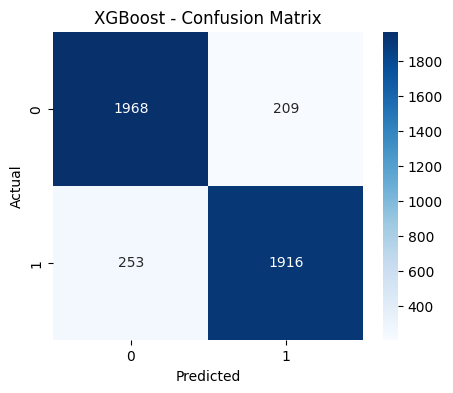

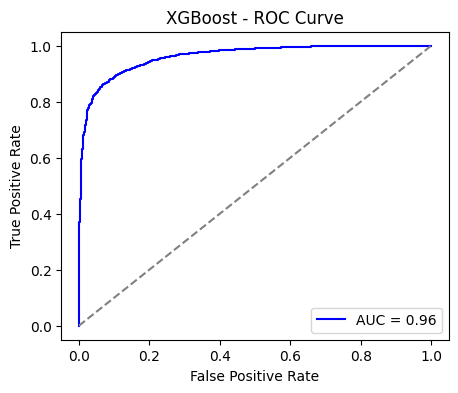

['../models/xgb_model.pkl']

In [8]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")
plot_roc_curve(y_test, y_prob_xgb, "XGBoost")

# Save Model
joblib.dump(xgb, "../models/xgb_model.pkl")


CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2177
           1       0.91      0.89      0.90      2169

    accuracy                           0.90      4346
   macro avg       0.90      0.90      0.90      4346
weighted avg       0.90      0.90      0.90      4346



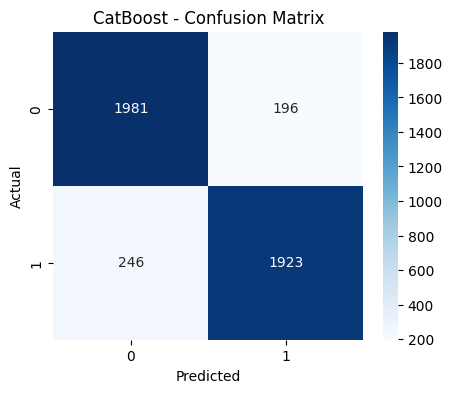

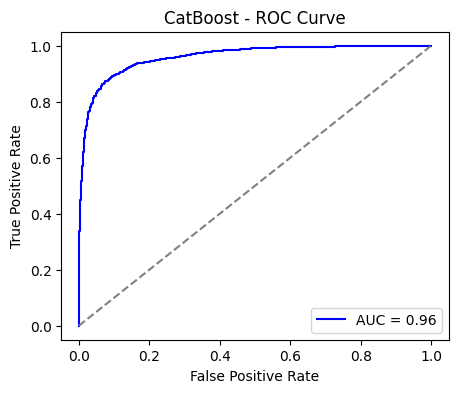

['../models/catboost_model.pkl']

In [9]:
cat = CatBoostClassifier(verbose=0)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)
y_prob_cat = cat.predict_proba(X_test)[:,1]

print("CatBoost Classification Report:\n", classification_report(y_test, y_pred_cat))

plot_confusion_matrix(y_test, y_pred_cat, "CatBoost")
plot_roc_curve(y_test, y_prob_cat, "CatBoost")

# Save Model
joblib.dump(cat, "../models/catboost_model.pkl")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8696, number of negative: 8688
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3562
[LightGBM] [Info] Number of data points in the train set: 17384, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500230 -> initscore=0.000920
[LightGBM] [Info] Start training from score 0.000920
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      2177
           1       0.90      0.88      0.89      2169

    accuracy                           0.89      4346
   macro avg       0.89      0.89      0.89      4346
weighted avg       0.89      0.89      0.89      4346



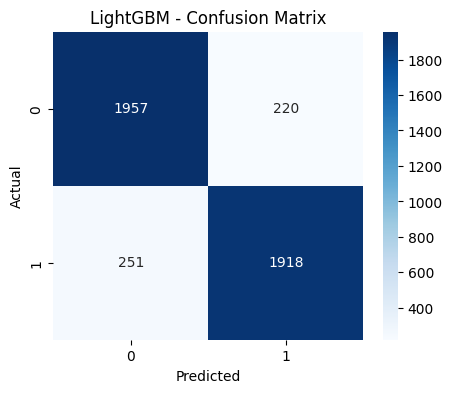

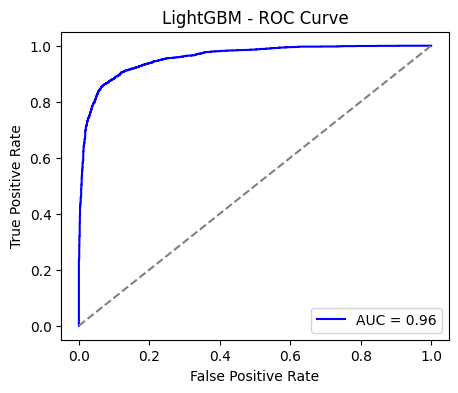

['../models/lgbm_model.pkl']

In [10]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
y_prob_lgbm = lgbm.predict_proba(X_test)[:,1]

print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgbm))

plot_confusion_matrix(y_test, y_pred_lgbm, "LightGBM")
plot_roc_curve(y_test, y_prob_lgbm, "LightGBM")

# Save Model
joblib.dump(lgbm, "../models/lgbm_model.pkl")


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      2177
           1       0.91      0.89      0.90      2169

    accuracy                           0.90      4346
   macro avg       0.90      0.90      0.90      4346
weighted avg       0.90      0.90      0.90      4346



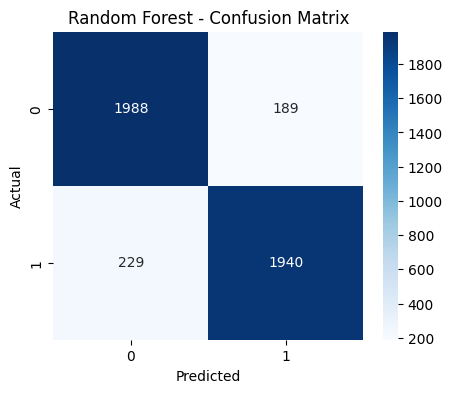

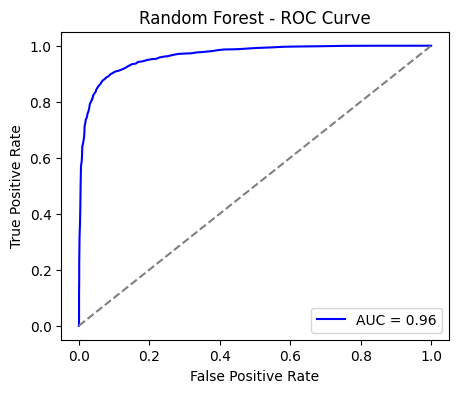

['../models/rf_model.pkl']

In [11]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_roc_curve(y_test, y_prob_rf, "Random Forest")

# Save Model
joblib.dump(rf, "../models/rf_model.pkl")


Gaussian NB Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.56      0.63      2177
           1       0.64      0.78      0.70      2169

    accuracy                           0.67      4346
   macro avg       0.68      0.67      0.67      4346
weighted avg       0.68      0.67      0.67      4346



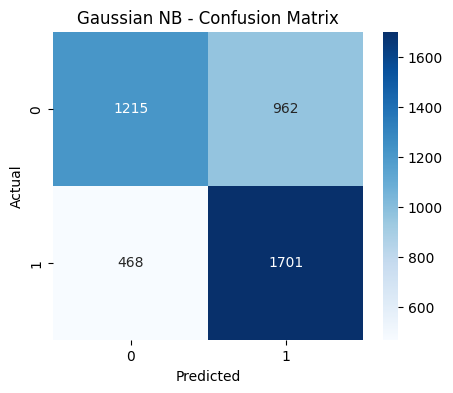

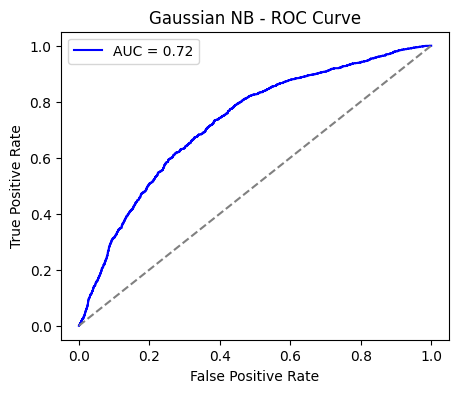

['../models/nb_model.pkl']

In [12]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:,1]

print("Gaussian NB Classification Report:\n", classification_report(y_test, y_pred_nb))

plot_confusion_matrix(y_test, y_pred_nb, "Gaussian NB")
plot_roc_curve(y_test, y_prob_nb, "Gaussian NB")

# Save Model
joblib.dump(nb, "../models/nb_model.pkl")


In [13]:
import joblib
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

# Load trained models (from wherever you trained them)
nb_model = GaussianNB()
lgbm_model = LGBMClassifier()

# Save them using joblib
joblib.dump(nb_model, "../models/nb_model.pkl")


['../models/nb_model.pkl']

In [14]:
joblib.dump(lgbm_model, "../models/lgbm_model.pkl")


['../models/lgbm_model.pkl']

In [37]:
import pickle
with open("../models/nb_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)


In [38]:
with open("../models/nb_model.pkl", "rb") as f:
    model = pickle.load(f)


In [40]:
# Example for GaussianNB
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  # Train with actual data
joblib.dump(nb_model, "../models/nb_model.pkl")


['../models/nb_model.pkl']

In [41]:
import lightgbm as lgb
import joblib

# Initialize LightGBM Classifier
lgbm_model = lgb.LGBMClassifier()

# Train the model with actual data
lgbm_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(lgbm_model, "../models/lgbm_model.pkl")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8696, number of negative: 8688
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3562
[LightGBM] [Info] Number of data points in the train set: 17384, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500230 -> initscore=0.000920
[LightGBM] [Info] Start training from score 0.000920


['../models/lgbm_model.pkl']

In [16]:
import joblib

model = joblib.load("../models/rf_model.pkl")

# If model was trained with pandas DataFrame, try this:
try:
    print(model.feature_names_in_)
except AttributeError:
    print("This model does not store feature names.")


['parent_protein_id' 'protein_seq' 'peptide_seq' 'chou_fasman' 'emini'
 'kolaskar_tongaonkar' 'parker' 'isoelectric_point' 'aromaticity'
 'hydrophobicity' 'stability' 'minhash_signature' 'Exact Match Exists'
 'Appears as Subsequence (MHC Binding)' 'Closest Peptide' 'Path Length']


In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score
import joblib

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]

print("Naive Bayes Report:\n", classification_report(y_test, y_pred_nb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_nb))

joblib.dump(nb, "../models/nb_model.pkl")


Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.72      0.56      0.63      2177
           1       0.64      0.78      0.70      2169

    accuracy                           0.67      4346
   macro avg       0.68      0.67      0.67      4346
weighted avg       0.68      0.67      0.67      4346

ROC AUC Score: 0.7249809558117652


['../models/nb_model.pkl']

In [18]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
y_prob_lgbm = lgbm.predict_proba(X_test)[:, 1]

print("LightGBM Report:\n", classification_report(y_test, y_pred_lgbm))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_lgbm))

joblib.dump(lgbm, "../models/lgbm_model.pkl")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8696, number of negative: 8688
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3562
[LightGBM] [Info] Number of data points in the train set: 17384, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500230 -> initscore=0.000920
[LightGBM] [Info] Start training from score 0.000920
LightGBM Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.89      2177
           1       0.90      0.88      0.89      2169

    accuracy                           0.89      4346
   macro avg       0.89      0.89      0.89      4346
weighted avg       0.89      0.89      0.89      4346

ROC AUC Score: 0.9578055546554967


['../models/lgbm_model.pkl']